#**Problem 2**

Modify the network architecture in [the notebook for classifying MNIST fashion items with dense layers and analyzing model performance](
https://colab.research.google.com/drive/1TTO7P5GTmsHhIt_YGqZYyw4KGBCnjqyW) by varying the number of hidden layers and choosing different sizes for the hidden layers.

Give three models consisting of only dense layers that 

- first model underfits (the model is too simple and cannot explain the data)
- second model overfits (the model is unnecessarily complex so it can easily adapt too much to the training data)
- third is pretty good (the model is either too simple, nor too complex; you don't train for too many epochs; you use dropout to fight overfitting)

Make sure that you plot the curves depicting the training/validation accuracy/loss.


In [0]:
# Import libraries
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images = train_images / 255.0
test_images = test_images / 255.0

## Helper Functions

In [0]:
def plot_loss(epochs, train_loss, test_loss):
  plt.plot(epochs, train_loss, 'bo', label='Training loss')
  plt.plot(epochs, test_loss, 'ro', label='Test loss')
  plt.title('Training and test loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

def plot_accuracy(epochs, train_acc, test_acc):
  plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
  plt.plot(epochs, test_acc, 'ro', label='Test accuracy')
  plt.title('Training and test accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

## Overfitting Model

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(2048, activation=tf.nn.relu),
    tf.keras.layers.Dense(2048, activation=tf.nn.relu),
    tf.keras.layers.Dense(2048, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 137us/sample - loss: 0.6055 - accuracy: 0.7701 - val_loss: 0.5859 - val_accuracy: 0.7920
Epoch 2/20
60000/60000 [==============================] - 7s 125us/sample - loss: 0.4221 - accuracy: 0.8444 - val_loss: 0.4685 - val_accuracy: 0.8328
Epoch 3/20
60000/60000 [==============================] - 7s 125us/sample - loss: 0.3749 - accuracy: 0.8615 - val_loss: 0.3946 - val_accuracy: 0.8540
Epoch 4/20
60000/60000 [==============================] - 7s 124us/sample - loss: 0.3461 - accuracy: 0.8709 - val_loss: 0.3707 - val_accuracy: 0.8652
Epoch 5/20
60000/60000 [==============================] - 7s 124us/sample - loss: 0.3250 - accuracy: 0.8790 - val_loss: 0.3978 - val_accuracy: 0.8567
Epoch 6/20
60000/60000 [==============================] - 7s 124us/sample - loss: 0.3088 - accuracy: 0.8850 - val_loss: 0.3374 - val_accuracy: 0.8795
Epoch 7/20
60000/60000 [==========================

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

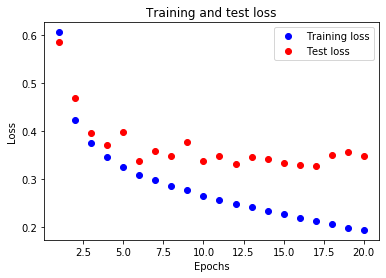

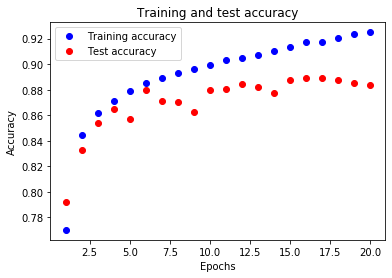

In [0]:
history_dict = history.history
epochs_range = range(1, epochs+1)

plot_loss(epochs_range, history_dict['loss'], history_dict['val_loss'])
plot_accuracy(epochs_range, history_dict['accuracy'], history_dict['val_accuracy'])

## Underfitting Model

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 81us/sample - loss: 2.1103 - accuracy: 0.1793 - val_loss: 1.9100 - val_accuracy: 0.2190
Epoch 2/20
60000/60000 [==============================] - 4s 72us/sample - loss: 1.8122 - accuracy: 0.2345 - val_loss: 1.7443 - val_accuracy: 0.2585
Epoch 3/20
60000/60000 [==============================] - 4s 73us/sample - loss: 1.7024 - accuracy: 0.2730 - val_loss: 1.6704 - val_accuracy: 0.3039
Epoch 4/20
60000/60000 [==============================] - 4s 73us/sample - loss: 1.6440 - accuracy: 0.3081 - val_loss: 1.6231 - val_accuracy: 0.3024
Epoch 5/20
60000/60000 [==============================] - 4s 73us/sample - loss: 1.6031 - accuracy: 0.3256 - val_loss: 1.5875 - val_accuracy: 0.3381
Epoch 6/20
60000/60000 [==============================] - 4s 73us/sample - loss: 1.5715 - accuracy: 0.3465 - val_loss: 1.5599 - val_accuracy: 0.3558
Epoch 7/20
60000/60000 [==============================] 

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

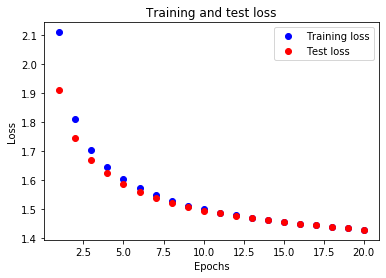

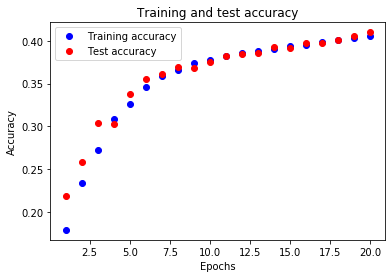

In [0]:
history_dict = history.history
epochs_range = range(1, epochs+1)

plot_loss(epochs_range, history_dict['loss'], history_dict['val_loss'])
plot_accuracy(epochs_range, history_dict['accuracy'], history_dict['val_accuracy'])

## Pretty Good Model

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(4096, activation=tf.nn.relu),
    tf.keras.layers.Dense(2048, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 296us/sample - loss: 0.8360 - accuracy: 0.6714 - val_loss: 0.6142 - val_accuracy: 0.7712
Epoch 2/20
60000/60000 [==============================] - 16s 270us/sample - loss: 0.5614 - accuracy: 0.7916 - val_loss: 0.5576 - val_accuracy: 0.7882
Epoch 3/20
60000/60000 [==============================] - 16s 275us/sample - loss: 0.4998 - accuracy: 0.8200 - val_loss: 0.5063 - val_accuracy: 0.7907
Epoch 4/20
60000/60000 [==============================] - 16s 263us/sample - loss: 0.4574 - accuracy: 0.8335 - val_loss: 0.4482 - val_accuracy: 0.8334
Epoch 5/20
60000/60000 [==============================] - 16s 266us/sample - loss: 0.4313 - accuracy: 0.8427 - val_loss: 0.4246 - val_accuracy: 0.8415
Epoch 6/20
60000/60000 [==============================] - 16s 270us/sample - loss: 0.4149 - accuracy: 0.8482 - val_loss: 0.4932 - val_accuracy: 0.8366
Epoch 7/20
60000/60000 [====================

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

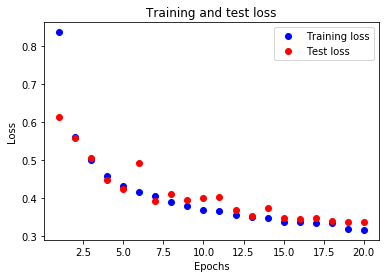

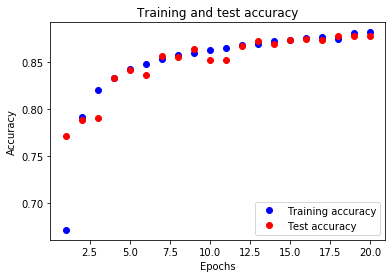

In [0]:
history_dict = history.history
epochs_range = range(1, epochs+1)

plot_loss(epochs_range, history_dict['loss'], history_dict['val_loss'])
plot_accuracy(epochs_range, history_dict['accuracy'], history_dict['val_accuracy'])